In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [7]:
data = pd.read_csv("vectorized.csv", index_col=0)

In [8]:
data

,NAME,file_n,total wc,的,是,不,了,在,有,這,...,等語,之.1,次查,復查,再查,系爭,固非無見,旋,惟查,均係
0,翁岳生,0,3000,26,32,43,NaN,21,65,NaN,...,NaN,366,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
1,翁岳生,0,3000,13,14,45,NaN,12,47,NaN,...,NaN,370,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN
2,翁岳生,0,3000,14,24,43,NaN,14,67,NaN,...,NaN,394,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN
3,翁岳生,0,3000,23,20,53,NaN,11,73,NaN,...,NaN,378,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN
4,翁岳生,0,3000,18,18,54,NaN,17,60,NaN,...,NaN,374,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
5,翁岳生,0,3000,23,26,47,NaN,12,71,NaN,...,NaN,358,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
6,翁岳生,0,3000,19,26,40,NaN,19,77,NaN,...,NaN,334,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN
7,翁岳生,0,3000,23,22,52,NaN,13,61,NaN,...,NaN,402,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN
8,翁岳生,0,3000,20,22,44,NaN,15,67,NaN,...,NaN,380,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
9,翁岳生,0,3000,12,30,50,NaN,25,58,NaN,...,NaN,360,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN


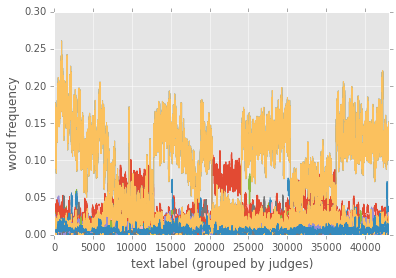

In [71]:
(data.iloc[:,3:]/3000).plot(legend = False)
plt.xlabel("text label (grouped by judges)")
plt.ylabel("word frequency")
plt.savefig("freq")

In [10]:
train_x = np.array(data.iloc[:,3:])
train_x = np.nan_to_num(train_x)
train_x = train_x/3000
train_y = np.array(data.iloc[:,0])

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
clf = RandomForestClassifier(n_estimators=100, n_jobs=2, criterion = "entropy")

In [15]:
clf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
test = pd.read_csv("test_ds.csv", index_col=0)

In [19]:
wc = np.array(test["total wc"])
temp = np.array(test.iloc[:,3:])
temp = np.nan_to_num(temp)
test_x = []
for i in range(wc.shape[0]):
    vec = temp[i]/wc[i]
    test_x.append(vec)
test_x = np.array(test_x)

In [25]:
predict = pd.Series(clf.predict(test_x), index=test.file_n)

In [29]:
predict.to_csv("predict.csv", encoding="utf8")

In [44]:
predict_proba = pd.DataFrame(clf.predict_proba(test_x), index=test.file_n.as_matrix(), columns=clf.classes_)

In [47]:
predict_proba.to_csv("predict_proba.csv", encoding="utf8")

In [63]:
feature_importances = pd.Series(clf.feature_importances_, index=test.columns[3:])

In [69]:
feature_importances.to_csv("feature_importances.csv")

In [78]:
test.iloc[20:40]

,NAME,file_n,total wc,的,是,不,了,在,有,這,...,等語,之.1,次查,復查,再查,系爭,固非無見,旋,惟查,均係
20,test data,451,532,3,4,12,NaN,2,7,NaN,...,NaN,70,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
21,test data,452,357,1,2,3,NaN,2,5,NaN,...,NaN,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,test data,453,323,1,2,4,NaN,1,3,NaN,...,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,test data,454,499,2,4,6,NaN,3,9,NaN,...,NaN,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,test data,455,332,1,NaN,5,NaN,1,5,NaN,...,2,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,test data,456,369,1,2,5,NaN,1,6,NaN,...,1,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,test data,457,442,NaN,2,10,NaN,1,5,NaN,...,NaN,50,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN
27,test data,458,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,test data,459,1113,1,6,17,NaN,3,22,NaN,...,1,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,test data,460,697,1,4,8,NaN,3,8,NaN,...,NaN,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


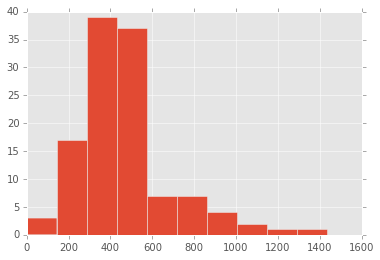

In [76]:
test["total wc"].hist()

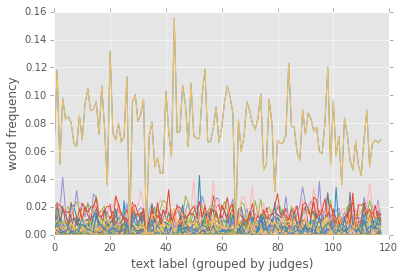

In [79]:
plt.plot(test_x)
plt.xlabel("text label (grouped by judges)")
plt.ylabel("word frequency")
plt.savefig("freq")